In [1]:
# 导包
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'

In [2]:
train_path = "./"

In [3]:
print(os.listdir(train_path))

['.ipynb_checkpoints', 'data', 'GRU.h5', 'GRU=数据0在第一位.ipynb', 'GRU=数据1在第一位.ipynb', 'GRU=数据2在第一位.ipynb', 'GRU=数据3在第一位.ipynb', 'GRU=数据4在第一位.ipynb', 'GRU=数据5在第一位.ipynb', 'GRU=数据6在第一位.ipynb', 'GRU=数据7在第一位.ipynb', 'GRU=数据8在第一位.ipynb', 'GRU=数据9在第一位.ipynb', 'model.h5', 'Untitled.ipynb']


In [4]:
# 读取文件


#dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
data = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/9在第一位.csv')
data

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,140.00000,2.5,11.0,2176.0,4.388082e+08,6270.60000,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.500000,3145920.0,-3.350000,0.270000,0.0,0.0,1
1,246.00000,1.0,31.0,2190.0,2.901218e+08,1763.40000,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,180.400000,3145920.0,4.630000,-3.790000,0.0,0.0,0
2,192.00000,2.5,10.0,2176.0,4.385378e+08,6000.20000,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.600000,3145920.0,-0.450000,1.830000,0.0,0.0,1
3,40.00000,3.0,11.0,2176.0,4.386708e+08,6133.20000,1.0,16.0,39.0,24.7,...,1.0,64.0,0.0,-2.000000,3145920.0,0.470000,4.070000,0.0,0.0,1
4,183.00000,2.5,10.0,2176.0,4.385288e+08,5991.20000,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.700000,3145920.0,-0.370000,2.570000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,35.26914,2.5,7.0,2176.0,4.390111e+08,6473.46914,0.0,16.0,43.0,24.7,...,1.0,64.0,0.0,13.473086,3145920.0,0.413852,0.904223,0.0,0.0,1
13824,142.00000,1.0,29.0,2190.0,1.898014e+08,6300.60000,0.0,50.0,29.0,24.3,...,1.0,64.0,0.0,199.400000,3145920.0,-1.600000,-0.010000,0.0,0.0,0
13825,93.00000,1.0,28.0,2190.0,1.892404e+08,5739.60000,0.0,50.0,35.0,25.1,...,1.0,64.0,0.0,202.200000,3145920.0,-1.300000,1.920000,0.0,0.0,0
13826,189.00000,2.5,10.0,2176.0,4.385348e+08,5997.20000,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.500000,3145920.0,-0.460000,2.000000,0.0,0.0,1


In [5]:
# 查看前5行数据
data.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,140.0,2.5,11.0,2176.0,438808200.0,6270.6,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.5,3145920.0,-3.35,0.27,0.0,0.0,1
1,246.0,1.0,31.0,2190.0,290121800.0,1763.4,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,180.4,3145920.0,4.63,-3.79,0.0,0.0,0
2,192.0,2.5,10.0,2176.0,438537800.0,6000.2,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.6,3145920.0,-0.45,1.83,0.0,0.0,1
3,40.0,3.0,11.0,2176.0,438670800.0,6133.2,1.0,16.0,39.0,24.7,...,1.0,64.0,0.0,-2.0,3145920.0,0.47,4.07,0.0,0.0,1
4,183.0,2.5,10.0,2176.0,438528800.0,5991.2,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.7,3145920.0,-0.37,2.57,0.0,0.0,1


In [6]:
data.index

RangeIndex(start=0, stop=13828, step=1)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count           13828 non-null  float64
 1   gpsPdop         13828 non-null  float64
 2   gpsNumSv        13828 non-null  float64
 3   gpsWeek         13828 non-null  float64
 4   itow            13828 non-null  float64
 5   gpsSec          13828 non-null  float64
 6   P_Sol_Status    13828 non-null  float64
 7   Pos_Type        13828 non-null  float64
 8   AvionicsTemp    13828 non-null  float64
 9   MainPowerV      13828 non-null  float64
 10  ServPowerV      13828 non-null  float64
 11  powerV          13828 non-null  float64
 12  APGlobalStatus  13828 non-null  float64
 13  GPSStatus       13828 non-null  float64
 14  mpStatus        13828 non-null  float64
 15  cmd             13828 non-null  float64
 16  Lat             13828 non-null  float64
 17  Lon             13828 non-null 

In [8]:
# 去除缺失数据
data.dropna(axis=0, how='any', inplace=True)

In [9]:
data

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,140.00000,2.5,11.0,2176.0,4.388082e+08,6270.60000,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.500000,3145920.0,-3.350000,0.270000,0.0,0.0,1
1,246.00000,1.0,31.0,2190.0,2.901218e+08,1763.40000,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,180.400000,3145920.0,4.630000,-3.790000,0.0,0.0,0
2,192.00000,2.5,10.0,2176.0,4.385378e+08,6000.20000,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.600000,3145920.0,-0.450000,1.830000,0.0,0.0,1
3,40.00000,3.0,11.0,2176.0,4.386708e+08,6133.20000,1.0,16.0,39.0,24.7,...,1.0,64.0,0.0,-2.000000,3145920.0,0.470000,4.070000,0.0,0.0,1
4,183.00000,2.5,10.0,2176.0,4.385288e+08,5991.20000,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.700000,3145920.0,-0.370000,2.570000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,35.26914,2.5,7.0,2176.0,4.390111e+08,6473.46914,0.0,16.0,43.0,24.7,...,1.0,64.0,0.0,13.473086,3145920.0,0.413852,0.904223,0.0,0.0,1
13824,142.00000,1.0,29.0,2190.0,1.898014e+08,6300.60000,0.0,50.0,29.0,24.3,...,1.0,64.0,0.0,199.400000,3145920.0,-1.600000,-0.010000,0.0,0.0,0
13825,93.00000,1.0,28.0,2190.0,1.892404e+08,5739.60000,0.0,50.0,35.0,25.1,...,1.0,64.0,0.0,202.200000,3145920.0,-1.300000,1.920000,0.0,0.0,0
13826,189.00000,2.5,10.0,2176.0,4.385348e+08,5997.20000,0.0,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.500000,3145920.0,-0.460000,2.000000,0.0,0.0,1


C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of  messages')

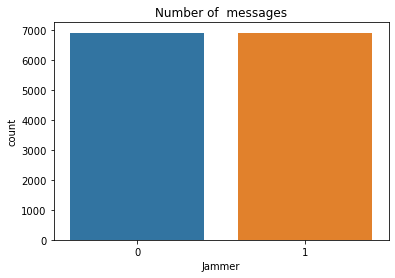

In [10]:
# 样本分布
# 以图方式表示
sns.countplot(data["Jammer"])
plt.xlabel("Jammer")
plt.title("Number of  messages")

In [11]:
# 重新排序
# df = data.sample(frac=1).reset_index(drop=True)

In [12]:
df = data

In [13]:
# 空值检查
# df[df.isnull().values==True]

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
# 划分数据集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [16]:
# 数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(9679, 64)
(9679,)
(4149, 64)
(4149,)


In [18]:
# 对数据处理
from keras.utils import np_utils

X_train = X_train.reshape((-1,1,64))
Y_train = np_utils.to_categorical(y_train)
X_test = X_test.reshape((-1,1,64))
Y_test = np_utils.to_categorical(y_test)


In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(9679, 1, 64)
(9679, 2)
(4149, 1, 64)
(4149, 2)


In [20]:
#导入保存模型
from keras import models 
from keras.models import load_model


model = load_model('model.h5')

In [21]:
# 预测
# predict_y = (model.predict(X_test) > 0.5)*1 
# predict_y = np.around(predict_y) # np.around
predict_y = model.predict_classes(X_test)

C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
predict_y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
y_test

5089     0
1696     0
3071     1
10219    0
6156     0
        ..
11102    0
11052    0
3311     0
286      1
13463    0
Name: Jammer, Length: 4149, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test,predict_y,digits=4))


              precision    recall  f1-score   support

           0     0.9955    0.9965    0.9960      2017
           1     0.9967    0.9958    0.9962      2132

    accuracy                         0.9961      4149
   macro avg     0.9961    0.9962    0.9961      4149
weighted avg     0.9961    0.9961    0.9961      4149



In [25]:
from sklearn.metrics import confusion_matrix

a = confusion_matrix(predict_y, y_test)
print(a)

[[2010    9]
 [   7 2123]]


In [26]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


accuracy_pca = accuracy_score(predict_y, y_test)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(predict_y, y_test)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(predict_y, y_test)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(predict_y, y_test)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

PCA测试集准确率: 0.9961


PCA测试集精确率: 0.9958


PCA测试集召回率: 0.9967


PCA测试集F1值: 0.9962


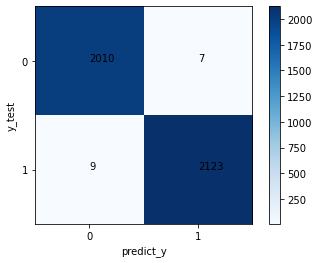

In [27]:
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(predict_y, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('predict_y')
plt.ylabel('y_test')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
 
plt.show()

[0 1]


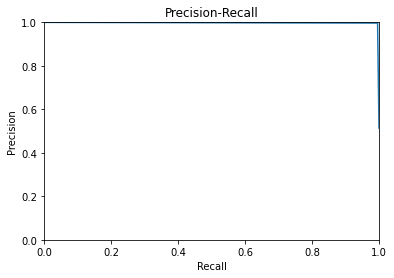

In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, predict_y) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()